In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# dataset - https://www.kaggle.com/aakash50897/churn-modellingcsv

In [20]:
dataset = pd.read_csv('datasets_13214_17927_Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [21]:
dataset.shape

(10000, 14)

In [22]:
x = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [23]:
x.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58


In [24]:
y.head(2)

0    1
1    0
Name: Exited, dtype: int64

In [25]:
geography = pd.get_dummies(x['Geography'],drop_first=True)
gender = pd.get_dummies(x['Gender'],drop_first=True)

In [26]:
x = pd.concat([x,geography,gender],axis=1)

In [27]:
x = x.drop(['Geography','Gender'],axis=1)

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [30]:
import keras
from keras.models import Sequential
from keras.layers import Dense
#from keras.layers import LeakyReLU,ELU
from keras.layers import Dropout

In [62]:
classifier = Sequential()
classifier.add(Dense(units=10,kernel_initializer='he_normal',activation='relu',input_dim=11))
classifier.add(Dropout(0.3))
classifier.add(Dense(units=20,kernel_initializer='he_normal',activation='relu',input_dim=11))
classifier.add(Dropout(0.4))
classifier.add(Dense(units=15,kernel_initializer='he_normal',activation='relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))


In [63]:
classifier.compile(optimizer='Adamax',loss='binary_crossentropy',metrics=['accuracy'])

In [64]:
model_history = classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
536/536 [==============================] - 1s 2ms/step - loss: 0.7112 - accuracy: 0.6986 - val_loss: 0.5582 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.6240 - accuracy: 0.7572 - val_loss: 0.5306 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5765 - accuracy: 0.7789 - val_loss: 0.5199 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5504 - accuracy: 0.7858 - val_loss: 0.5133 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5406 - accuracy: 0.7934 - val_loss: 0.5095 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5209 - accuracy: 0.7953 - val_loss: 0.5032 - val_accuracy: 0.7955
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5193 - accuracy: 0.7959 - val_loss: 0.5009 - val_accuracy: 0.7955

In [65]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


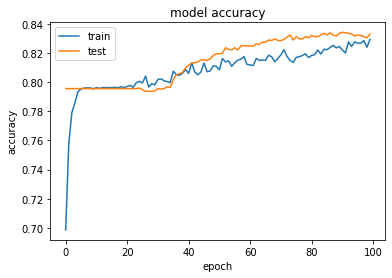

In [66]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc="upper left")
plt.show()

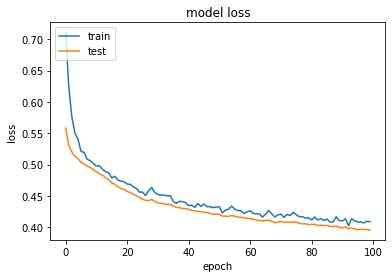

In [67]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc="upper left")
plt.show()

In [68]:
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

In [69]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1542,   53],
       [ 252,  153]])

In [70]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test,y_pred)
score

0.8475